In [1]:
import nltk

In [2]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [3]:
from matplotlib import pylab

from nltk.text import Text

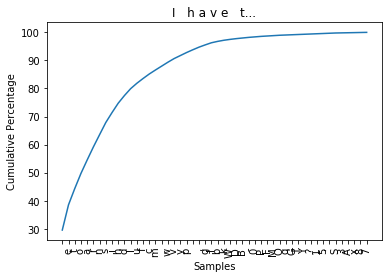

In [4]:
text = Text(paragraph)
fd = text.vocab()

samples = [item for item, _ in fd.most_common(50)]
values = [fd[sample] for sample in samples]
values = [sum(values[: i + 1]) * 100.0 / fd.N() for i in range(len(values))]
pylab.title(text.name)
pylab.xlabel("Samples")
pylab.ylabel("Cumulative Percentage")
pylab.plot(values)
pylab.xticks(range(len(samples)), [str(s) for s in samples], rotation=90)
pylab.show()

In [8]:
from nltk import parse, CFG

In [9]:
grammar = CFG.fromstring(
    """
    # Grammatical productions.
        S -> NP VP
        VP -> VP PP | V NP | V
        NP -> Det N | NP PP
        PP -> P NP
    # Lexical productions.
        NP -> 'John' | 'I'
        Det -> 'the' | 'my' | 'a'
        N -> 'dog' | 'cookie' | 'table' | 'cake' | 'fork'
        V -> 'ate' | 'saw'
        P -> 'on' | 'under' | 'with'
    """
)

sent = "John ate the cake on the table with a fork"
tokens = list(sent.split())

parser = parse.ChartParser(grammar)
ps = list(parser.parse(tokens))
for p in parser.parse(tokens):
    print(p)

(S
  (NP John)
  (VP
    (V ate)
    (NP
      (NP
        (NP (Det the) (N cake))
        (PP (P on) (NP (Det the) (N table))))
      (PP (P with) (NP (Det a) (N fork))))))
(S
  (NP John)
  (VP
    (V ate)
    (NP
      (NP (Det the) (N cake))
      (PP
        (P on)
        (NP
          (NP (Det the) (N table))
          (PP (P with) (NP (Det a) (N fork))))))))
(S
  (NP John)
  (VP
    (VP
      (VP (V ate) (NP (Det the) (N cake)))
      (PP (P on) (NP (Det the) (N table))))
    (PP (P with) (NP (Det a) (N fork)))))
(S
  (NP John)
  (VP
    (VP
      (V ate)
      (NP
        (NP (Det the) (N cake))
        (PP (P on) (NP (Det the) (N table)))))
    (PP (P with) (NP (Det a) (N fork)))))
(S
  (NP John)
  (VP
    (VP (V ate) (NP (Det the) (N cake)))
    (PP
      (P on)
      (NP
        (NP (Det the) (N table))
        (PP (P with) (NP (Det a) (N fork)))))))


In [3]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     /Users/austinjung/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [5]:
print(", ".join(brown.words()[:10]))

The, Fulton, County, Grand, Jury, said, Friday, an, investigation, of


In [6]:
print(brown.sents()[:10])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.'], ['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'rep

In [9]:
print(brown.tagged_words()[:10])

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN')]


In [10]:
print(brown.tagged_sents()[:10])

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [14]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/austinjung/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [15]:
nltk.help.brown_tagset(tagpattern=None)

(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a every th' ever' ye
BE: verb 'to be', infinitive or imperative
    be
BED: verb 'to be', past tense, 2nd person singular or all persons plural
    were
BED*: verb 'to be', past tense, 2nd person singular or 

In [16]:
len(brown.words())

1161192

In [17]:
len(set(brown.words()))

56057

In [18]:
brown_words_with_tags = {}
for word, tag in brown.tagged_words():
    if word not in brown_words_with_tags:
        brown_words_with_tags[word] = []
    if tag not in brown_words_with_tags[word]:
        brown_words_with_tags[word].append(tag)
        
len(brown_words_with_tags)

56057

In [19]:
brown_words_with_tags['who']

['WPS', 'WPO']

In [20]:
from pyciiml.utils.file_utils import read_json, check_create_dir, write_json, list_files_of_type

In [21]:
write_json(brown_words_with_tags, 'brown_words_with_tags.json')